# Human, Economic Freedom Index & Political Freedom Datasets
## World Bank and Freedom House

About this file
The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries. The measurement of economic freedom is based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

Rule of Law (property rights, government integrity, judicial
effectiveness)
Government Size (government spending, tax burden, fiscal health)
Regulatory Efficiency (business freedom, labor freedom, monetary
freedom)
Open Markets (trade freedom, investment freedom, financial
freedom)

Sources: Kaggle 
https://www.kaggle.com/gsutters/the-human-freedom-index?select=hfi_cc_2019.csv
https://www.kaggle.com/lewisduncan93/the-economic-freedom-index 

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import time

We tried to review Freedom House (fh_index) and The Economic Feedom Index (econ_index), but their features were already clustered as composite indices. So we used the third data set, 

In [2]:
fh_file = '/Users/mehrunisaqayyum/Downloads/index 3.csv'
freedom_df = pd.read_csv(fh_file)
freedom_df

Country  2001 Legal Score  2001 Political Score  \
0     Afghanistan               NaN                   NaN   
1         Albania              24.0                  12.0   
2         Algeria              21.0                  26.0   
3         Andorra               NaN                   NaN   
4          Angola              21.0                  33.0   
..            ...               ...                   ...   
205  Yemen, North               NaN                   NaN   
206  Yemen, South               NaN                   NaN   
207    Yugoslavia               NaN                   NaN   
208        Zambia              22.0                  24.0   
209      Zimbabwe              26.0                  34.0   

     2001 Economic Score  2001 Score 2001 Status  2002 Legal Score  \
0                    NaN         NaN         NaN              24.0   
1                   12.0        48.0          PF              20.0   
2                   15.0        62.0          NF              21.0   
3                    NaN         NaN         NaN               1.0   
4                   25.0        79.0          NF              20.0   
..                   ...         ...         ...               ...   
205                  NaN         NaN         NaN               NaN   
206                  NaN         NaN         NaN               NaN   
207                  NaN         NaN         NaN               NaN   
208                 19.0        65.0          NF              20.0   
209                 23.0        83.0          NF              30.0   

     2002 Political Score  2002 Economic Score  2002 Score  ...  \
0                    30.0                 20.0        74.0  ...   
1                    18.0                 12.0        50.0  ...   
2                    24.0                 17.0        62.0  ...   
3                     1.0                  6.0         8.0  ...   
4                    30.0                 22.0        72.0  ...   
..                    ...                  ...         ...  ...   
205                   NaN                  NaN         NaN  ...   
206                   NaN                  NaN         NaN  ...   
207                   NaN                  NaN         NaN  ...   
208                  24.0                 19.0        63.0  ...   
209                  34.0                 24.0        88.0  ...   

    2014 Legal Score  2014 Political Score  2014 Economic Score  2014 Score  \
0               20.0                  28.0                 19.0        67.0   
1               15.0                  17.0                 17.0        49.0   
2               21.0                  23.0                 17.0        61.0   
3                1.0                   4.0                  8.0        13.0   
4               19.0                  30.0                 21.0        70.0   
..               ...                   ...                  ...         ...   
205              NaN                   NaN                  NaN         NaN   
206              NaN                   NaN                  NaN         NaN   
207              NaN                   NaN                  NaN         NaN   
208             18.0                  25.0                 19.0        62.0   
209             23.0                  23.0                 24.0        70.0   

     2014 Status 2015 Legal Score  2015 Political Score  2015 Economic Score  \
0             NF             18.0                  26.0                 18.0   
1             PF             15.0                  18.0                 18.0   
2             NF             22.0                  23.0                 17.0   
3              F              1.0                   4.0                  8.0   
4             NF             20.0                  30.0                 21.0   
..           ...              ...                   ...                  ...   
205          NaN              NaN                   NaN                  NaN   
206          NaN              NaN         

In [5]:
from pandas_profiling import ProfileReport
ProfileReport(freedom_df)

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [4]:
econ_file = '/Users/mehrunisaqayyum/Downloads/datasets_127094_304788_economic_freedom_index2019_data.csv'
#econ_df = pd.read_csv(econ_file,encoding="utf-8")
econ_df = pd.read_csv(econ_file,encoding="ISO-8859-1")
econ_df

CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5             19.6   
1          52.0         27.0        66.5             54.8   
2         171.0         14.0        46.2             31.6   
3         156.0         33.0        50.6             35.9   
4         148.0         26.0        52.2             47.8   
..          ...          ...         ...              ...   
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  ...      Country  \
0                     29.6                  25.2  ...  Afghanistan   
1                     30.6                  40.4  ...      Albania   
2                     36.2                  28.9  ...      Algeria   
3                     26.6                  20.5  ...       Angola   
4                     44.5                  33.5  ...    Argentina   
..                     ...                   ...  ...          ...   
181                   13.1                   7.9  ...    Venezuela   
182                   40.3                  34.0  ...      Vietnam   
183                   22.2                  20.3  ...        Yemen   
184                   35.6                  32.3  ...       Zambia   
185                   24.8                  15.8  ...     Zimbabwe   

     Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                     35.5               $69.6                   2.5   
1                      2.9               $36.0                   3.9   
2                     41.5              $632.9                   2.0   
3                     28.2              $190.3                   0.7   
4                     44.1              $920.2                   2.9   
..                     ...                  ...                  ...   
181                   31.4              $380.7                 -14.0   
182                   93.6              $647.4                   6.8   
183                   30.0               $38.6                 -13.8   
184                   17.2               $68.9                   3.6   
185                   14.9               $34.0                   3.0   

     5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                           2.9                $1,958               8.8   
1                           2.5               $12,507              13.9   
2                           3.1               $15,237              10.0   
3                           2.9                $6,753               8.2   
4                           0.7               $20,876               8.7   
..                          ...                   ...               ...   
181                        -7.8               $12,114               7.7   
182                         6.2                $6,913               2.1   
18

In [10]:
econ_df['Property Rights'].value_counts()

29.7    4
31.6    4
36.5    3
37.4    3
49.9    3
       ..
73.6    1
65.1    1
35.8    1
86.1    1
63.5    1
Name: Property Rights, Length: 128, dtype: int64

In [6]:
econ_df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [63]:
#Create a new df to preserve features
df_pca = econ_df.iloc[:,4:24]
df_pca

World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5             19.6   
1          52.0         27.0        66.5             54.8   
2         171.0         14.0        46.2             31.6   
3         156.0         33.0        50.6             35.9   
4         148.0         26.0        52.2             47.8   
..          ...          ...         ...              ...   
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
0                     29.6                  25.2        91.7            80.3   
1                     30.6                  40.4        86.3            73.9   
2                     36.2                  28.9        76.4            48.7   
3                     26.6                  20.5        83.9            80.7   
4                     44.5                  33.5        69.3            49.5   
..                     ...                   ...         ...             ...   
181                   13.1                   7.9        74.7            58.1   
182                   40.3                  34.0        79.7            74.1   
183                   22.2                  20.3         NaN            83.7   
184                   35.6                  32.3        72.3            80.1   
185                   24.8                  15.8        62.3            74.5   

     Fiscal Health  Business Freedom  Labor Freedom  Monetary Freedom  \
0             99.3              49.2           60.4              76.7   
1             80.6              69.3           52.7              81.5   
2             18.7              61.6           49.9              74.9   
3             58.2              55.7           58.8              55.4   
4             33.0              56.4           46.9              60.2   
..             ...               ...            ...               ...   
181           17.6              33.9           28.0               0.0   
182           40.7              63.5           62.8              68.9   
183            0.0              45.1           49.8              61.5   
184           12.3              71.1           46.0              70.3   
185           23.7              33.4           43.3              72.4   

     Trade Freedom  Investment Freedom   Financial Freedom  Tariff Rate (%)  \
0             66.0                 10.0               10.0              7.0   
1             87.8                 70.0               70.0              1.1   
2             67.4                 30.0               30.0              8.8   
3             61.2                 30.0               40.0              9.4   
4             70.0                 55.0               60.0              7.5   
..             ...                  ...                ...              ...   
181           60.0                  0.0               10.0             10.0   
182           79.2                 30.0               40.0              2.9   
183           71.4                 50.0                NaN              4.3   
184           72.6                 55.0               50.0              6.2   
185           70.0                 25.0               10.0              5.0   

     Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
0                   20.0                    20.0                  5.0   
1                   23.0                    15.0                 24.9   
2                   35.0                    23.0                 24.5   
3                   17.0                    30.0                 20.6   
4                   35.0                    30.0                 30.8   
..                   ...                     ..

## PCA

## Goal
1) identify correlated features that are numerical
2) Save as X
3) Identify predicted: Y (region)
4) Reduce correlated features: unemploymet, inflation, GDP
5) Standardize X = X_std
6) Use X_std to fit for clustering 
7) Predict labeled column 'Y' region
8) Plot visual of region clustered around the reduced features: unemploymet, inflation, GDP

In [64]:
#Determine target and features to reduce (X)
X = df_pca.dropna() #features that have numerical values
y = econ_df[('Unemployment (%)')]  #feature is numerical 

In [65]:
#Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [66]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
#%timeit 
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

In [23]:
y_pred

array([3, 2, 0, 3, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 3, 0, 2, 0,
       2, 2, 2, 3, 3, 0, 0, 1, 2, 3, 3, 1, 2, 2, 0, 3, 3, 2, 2, 0, 3, 2,
       2, 1, 3, 2, 0, 3, 0, 0, 3, 3, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 3, 3,
       2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       3, 0, 0, 0, 2, 3, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 3, 1, 2, 2, 0, 2, 2, 0, 3,
       3, 1, 1, 1, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 0, 3, 1, 1, 1, 1, 0, 0,
       3, 0, 0, 3], dtype=int32)

In [67]:
Y = econ_df['Region']

kmeans_cluster.fit(X_std)
Y = kmeans_cluster.predict(X_std)
Y

array([3, 2, 1, 3, 1, 2, 0, 0, 2, 2, 2, 3, 2, 2, 0, 3, 3, 2, 1, 2, 2, 1,
       2, 2, 3, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 2, 3, 3, 1, 2, 3, 2, 1, 2,
       2, 0, 1, 2, 3, 1, 3, 3, 1, 1, 0, 3, 3, 2, 0, 0, 3, 3, 2, 0, 3, 1,
       3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 0,
       2, 2, 2, 3, 2, 3, 1, 1, 2, 0, 2, 2, 3, 3, 2, 2, 3, 0, 3, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 3, 0, 0, 3, 3, 3, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 0, 2, 0, 1, 2, 0, 3, 3, 3,
       0, 0, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 3, 3, 1, 2, 0, 0, 2, 3, 2, 1,
       3, 3, 1], dtype=int32)

In [26]:
Y

array([3, 2, 0, 3, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 3, 0, 2, 0,
       2, 2, 2, 3, 3, 0, 0, 1, 2, 3, 3, 1, 2, 2, 0, 3, 3, 2, 2, 0, 3, 2,
       2, 1, 3, 2, 0, 3, 0, 0, 3, 3, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 3, 3,
       2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       3, 0, 0, 0, 2, 3, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 3, 1, 2, 2, 0, 2, 2, 0, 3,
       3, 1, 1, 1, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 0, 3, 1, 1, 1, 1, 0, 0,
       3, 0, 0, 3], dtype=int32)

In [24]:
X_std

array([[ 1.18358632,  1.45326723, -0.82572973, -1.7358259 , -0.89174187,
        -0.8666482 ],
       [-0.74094428,  0.50862166,  0.51064279,  0.09181471, -0.83578457,
        -0.08957883],
       [ 1.54924713, -0.51474437, -1.29791468, -1.1127666 , -0.52242364,
        -0.67749315],
       ...,
       [ 0.72169897,  0.74478306, -0.48718202, -0.16779333, -0.29299868,
        -0.41676593],
       [ 0.91415203,  0.50862166, -0.63863758, -0.41701705, -0.55599803,
        -0.50367501],
       [ 1.62622835,  1.92559002, -1.81464539, -1.21141765, -1.16033695,
        -1.34720425]])

In [33]:
pca

array([[-2.81465281e+00,  3.37374224e-01],
       [ 1.54566745e-02, -1.84159448e-02],
       [-1.99692303e+00, -7.51353229e-01],
       [-2.53157889e+00,  1.02657550e-01],
       [-1.26918413e+00,  3.46732470e-01],
       [ 5.61622613e-01,  1.91281351e-02],
       [ 4.22636158e+00,  2.70646737e-01],
       [ 3.05131508e+00,  9.96997709e-01],
       [ 9.94554117e-01, -3.51820124e-01],
       [ 1.81999733e-01, -5.37519064e-01],
       [ 1.52791114e+00, -6.82018022e-01],
       [-1.61918410e+00, -2.31788022e-01],
       [ 1.12317277e+00, -1.37317178e-01],
       [-7.13392308e-01,  1.47317958e+00],
       [ 2.09586566e+00,  1.37295640e+00],
       [-1.09464853e+00, -7.04712673e-02],
       [-1.45352024e+00, -5.27107934e-01],
       [ 1.03341031e+00,  1.87736493e-01],
       [-3.58568239e+00, -4.29096263e-01],
       [-1.05138161e+00,  4.44453565e-01],
       [ 1.59175221e+00, -1.08670195e+00],
       [-1.06539000e+00,  5.81894755e-01],
       [ 1.08315235e+00, -1.71158123e-01],
       [ 7.

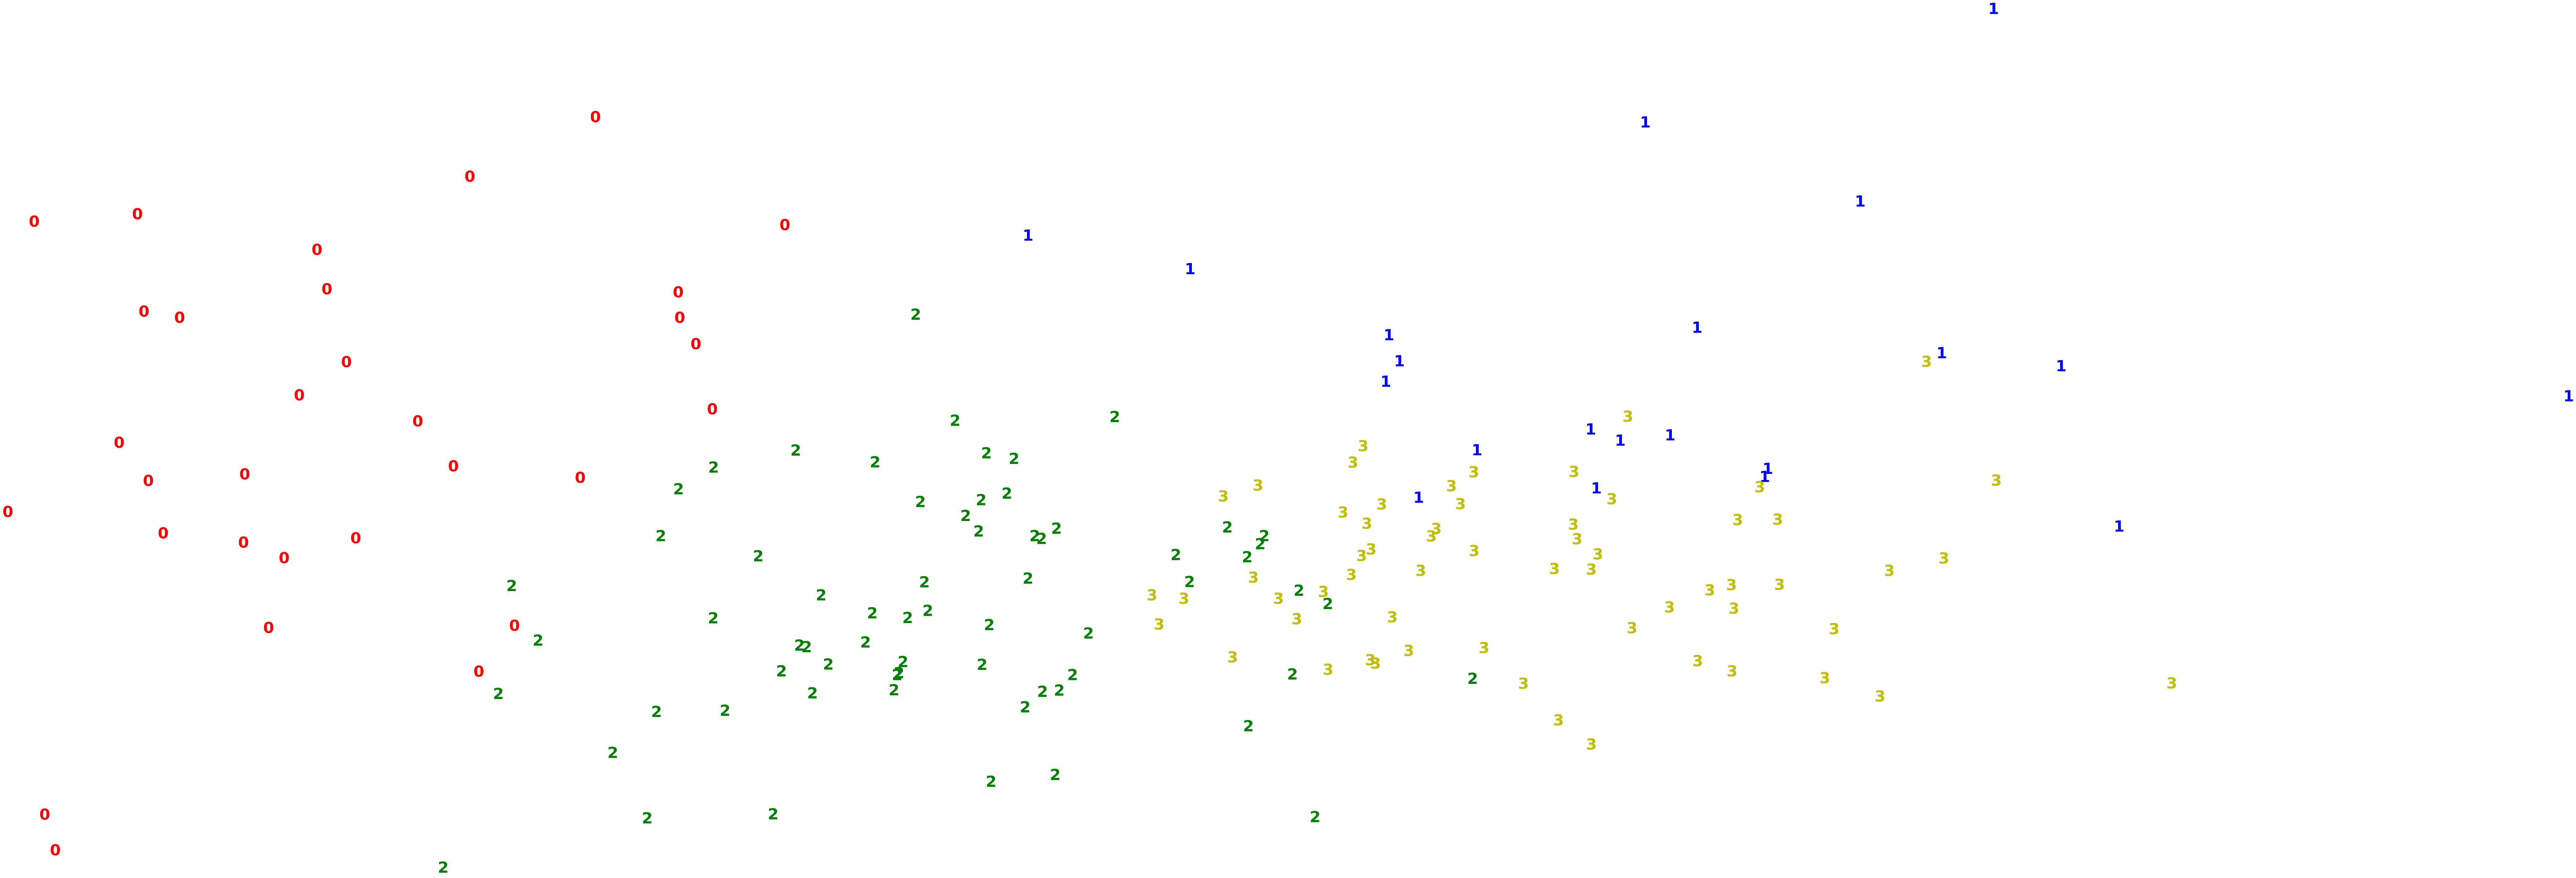

In [68]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgy' #need to specify a color for each cluster of regions 
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y[i]), #region label
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [41]:
econ_df['Region'].value_counts()  #5 regions

Sub-Saharan Africa              48
Europe                          45
Asia-Pacific                    43
Americas                        32
Middle East and North Africa    18
Name: Region, dtype: int64

In [42]:
#Create a dictionary of {Region}
region_dict = {'Sub-Saharan Africa':0,'Europe':1,'Asia-Pacific':2,'Americas':3,'Middle East and North Africa':4}
region_dict

{'Sub-Saharan Africa': 0,
 'Europe': 1,
 'Asia-Pacific': 2,
 'Americas': 3,
 'Middle East and North Africa': 4}

In [43]:
#region_dict['Europe']

1

In [47]:
#variable for region
econ_df.iloc[3,3]

'Sub-Saharan Africa'

In [49]:
econ_df['Region'][3]

'Sub-Saharan Africa'

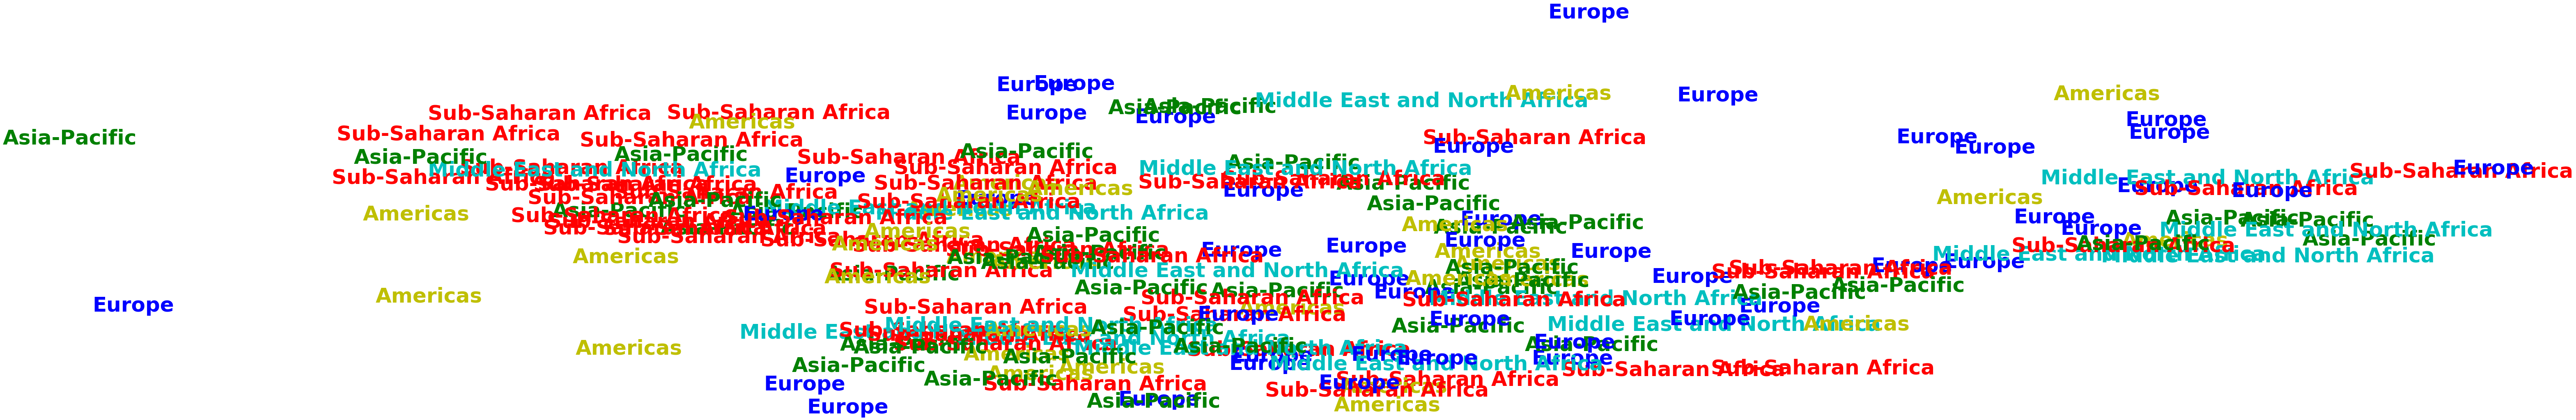

In [52]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgyc'  #Create a column that translates each region to a number
for i in range(pca.shape[0]):
    my_key = econ_df['Region'][i]  #Created a new variable for loop
    plt.text(pca[i, 0], pca[i, 1], (econ_df['Region'][i]), #region label doesn't need to convert string
             color=colours[region_dict[my_key]], #specifying dicitonary w/df
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Agglomerative Clustering

In [70]:
# Use Agglomaerative Clustering 
    #class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)[source]
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=10)

agg_cluster.fit(X) #_predict(X)

AgglomerativeClustering(n_clusters=10)

# Human Freedom

In [2]:
#datasets_93172_883723_hfi_cc_2019.csv

human_file = '/Users/mehrunisaqayyum/Downloads/datasets_93172_883723_hfi_cc_2019.csv' 
human_df = pd.read_csv(human_file)
human_df

year ISO_code    countries                         region hf_score  \
0     2017      ALB      Albania                 Eastern Europe     7.84   
1     2017      DZA      Algeria     Middle East & North Africa     4.99   
2     2017      AGO       Angola             Sub-Saharan Africa      5.4   
3     2017      ARG    Argentina  Latin America & the Caribbean     6.86   
4     2017      ARM      Armenia        Caucasus & Central Asia     7.42   
...    ...      ...          ...                            ...      ...   
1615  2008      AUS    Australia                        Oceania     8.73   
1616  2008      DNK      Denmark                 Western Europe     8.73   
1617  2008      CHE  Switzerland                 Western Europe     8.83   
1618  2008      NZL  New Zealand                        Oceania     8.94   
1619  2008      HKG    Hong Kong                      East Asia     9.12   

     hf_rank hf_quartile pf_rol_procedural pf_rol_civil pf_rol_criminal  ...  \
0         38           1               6.7          4.5             4.7  ...   
1        155           4                 -            -               -  ...   
2        151           4                 -            -               -  ...   
3         77           2               7.1          5.8             4.3  ...   
4         54           2                 -            -               -  ...   
...      ...         ...               ...          ...             ...  ...   
1615       4           1               8.8          7.2             7.2  ...   
1616       4           1               9.4          7.9             8.7  ...   
1617       3           1                 -            -               -  ...   
1618       2           1               8.7          7.6             7.9  ...   
1619       1           1               7.9          7.1             7.6  ...   

     ef_regulation_business_adm ef_regulation_business_bureaucracy  \
0                           6.3                                6.7   
1                           3.7                                1.8   
2                           2.4                                1.3   
3                           2.5                                7.1   
4                           4.6                                6.2   
...                         ...                                ...   
1615                        3.7                                4.6   
1616                        4.7                                7.4   
1617                        5.5                                7.8   
1618                        4.5                                4.5   
1619                        6.9                                6.9   

     ef_regulation_business_start ef_regulation_business_bribes  \
0                             9.7                           4.1   
1                             9.3                           3.8   
2                             8.7                           1.9   
3                             9.6                           3.3   
4                             9.9                           4.6   
...                           ...                           ...   
1615                          9.9                           8.6   
1616                          9.7                           9.4   
1617                          9.3                           8.8   
1618                           10                           9.6   
1619                          9.8                           8.5   

     ef_regulation_business_licensing ef_regulation_business_compliance  \
0                                   6                               7.2   
1                                 8.7                                 7   
2                                 8.1                               6.8   
3                                 5.4                               6.5   
4                                 9.3                               7.1   
...                               ..

In [4]:
#ProfileReport(human_df)

In [100]:
human_df.iloc[:,108].value_counts()

10    914
0     237
3     203
1     127
-      81
5      58
Name: ef_regulation_labor_conscription, dtype: int64

In [5]:
pd.Series([1,2,float('nan'),3]).median()

2.0

Let us list each variable from columns 4 to 119 so we can see if values are only integars and is listed as a string.

In [6]:
human_df.columns.tolist()
#another way is to print(df.columns)

['year',
 'ISO_code',
 'countries',
 'region',
 'hf_score',
 'hf_rank',
 'hf_quartile',
 'pf_rol_procedural',
 'pf_rol_civil',
 'pf_rol_criminal',
 'pf_rol',
 'pf_ss_homicide',
 'pf_ss_disappearances_disap',
 'pf_ss_disappearances_violent',
 'pf_ss_disappearances_organized',
 'pf_ss_disappearances_fatalities',
 'pf_ss_disappearances_injuries',
 'pf_ss_disappearances',
 'pf_ss_women_fgm',
 'pf_ss_women_inheritance_widows',
 'pf_ss_women_inheritance_daughters',
 'pf_ss_women_inheritance',
 'pf_ss_women',
 'pf_ss',
 'pf_movement_domestic',
 'pf_movement_foreign',
 'pf_movement_women',
 'pf_movement',
 'pf_religion_estop_establish',
 'pf_religion_estop_operate',
 'pf_religion_estop',
 'pf_religion_harassment',
 'pf_religion_restrictions',
 'pf_religion',
 'pf_association_association',
 'pf_association_assembly',
 'pf_association_political_establish',
 'pf_association_political_operate',
 'pf_association_political',
 'pf_association_prof_establish',
 'pf_association_prof_operate',
 'pf_asso

In [75]:
human_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Columns: 120 entries, year to ef_rank
dtypes: int64(1), object(119)
memory usage: 1.5+ MB


# Data Cleaning

In [7]:
human_df.shape

(1620, 120)

### Observation
There are 1,620 observations and 120 indices/features. 

In [105]:
from collections import Counter
big_list_of_strings = []

human_df.applymap(lambda x: big_list_of_strings.append(x) if type(x) == str else None)

c = Counter(big_list_of_strings)


In [106]:
c

Counter({'ALB': 10,
         'DZA': 10,
         'AGO': 10,
         'ARG': 10,
         'ARM': 10,
         'AUS': 10,
         'AUT': 10,
         'AZE': 10,
         'BHS': 10,
         'BHR': 10,
         'BGD': 10,
         'BRD': 10,
         'BLR': 10,
         'BEL': 10,
         'BLZ': 10,
         'BEN': 10,
         'BTN': 10,
         'BOL': 10,
         'BIH': 10,
         'BWA': 10,
         'BRA': 10,
         'BRN': 10,
         'BGR': 10,
         'BFA': 10,
         'BDI': 10,
         'KHM': 10,
         'CMR': 10,
         'CAN': 10,
         'CPV': 10,
         'CAF': 10,
         'TCD': 10,
         'CHL': 10,
         'CHN': 10,
         'COL': 10,
         'COD': 10,
         'COG': 10,
         'CRI': 10,
         'CIV': 10,
         'HRV': 10,
         'CYP': 10,
         'CZE': 10,
         'DNK': 10,
         'DOM': 10,
         'ECU': 10,
         'EGY': 10,
         'SLV': 10,
         'EST': 10,
         'SWZ': 10,
         'ETH': 10,
         'FJI': 10,


In [8]:
#NEW CODE
for x in range(5,119):
    #human_df.iloc[:,x] = human_df.iloc[:,x].replace({'-': np.nan})
    human_df.iloc[:,x] = pd.to_numeric(human_df.iloc[:,x], errors='coerce')
    human_df.iloc[:,x] = human_df.iloc[:,x].fillna(human_df.iloc[:,x].dropna().median())

#Dropping the Nans, then filling them in w/the median

In [9]:
human_df.shape == human_df.dropna().shape
#It's fixed

True

In [111]:
print(human_df.median())

year                                 2012.50
hf_rank                                77.00
hf_quartile                             2.00
pf_rol_procedural                       5.20
pf_rol_civil                            5.30
                                      ...   
ef_regulation_business_licensing        8.15
ef_regulation_business_compliance       7.50
ef_regulation_business                  6.30
ef_regulation                           7.10
ef_score                                6.88
Length: 115, dtype: float64


#Fill in - missing value with Median through Imputing
#We see in column 108 that there's another string value. We need to replace and fill by imputing with median.
human_df.iloc[:,5]

for x in range(5,119):
    temp = human_df.iloc[:,x].replace({'-': np.nan})
    temp.fillna(temp.dropna().median())
    #human_df.iloc[:,x].replace('-').astype(float)
    #human_df.iloc[:,x].fillna(human_df.iloc[:,x].median())
print(temp.dropna().median())

In [10]:
#help to identify what was dropped
human_df.dropna(axis='columns').shape

(1620, 120)

In [157]:
set(human_df.columns)-set(human_df.dropna(axis='columns'))

{'ef_regulation',
 'ef_regulation_business',
 'ef_regulation_business_adm',
 'ef_regulation_business_bribes',
 'ef_regulation_business_bureaucracy',
 'ef_regulation_business_compliance',
 'ef_regulation_business_licensing',
 'ef_regulation_business_start',
 'ef_regulation_labor',
 'ef_regulation_labor_conscription',
 'ef_regulation_labor_dismissal',
 'ef_score'}

In [159]:
human_df.ef_regulation.isna().value_counts()
#There are 80 NaNs in these dropped columns

False    1540
True       80
Name: ef_regulation, dtype: int64

In [160]:
human_df.columns.tolist()[118:]

['ef_score', 'ef_rank']

In [148]:
human_df.shape == human_df.dropna().shape

False

In [150]:
human_df.shape

(1620, 120)

In [151]:
human_df.dropna().shape

(1372, 120)

In [63]:
#Unique values
human_df['ef_trade_tariffs'].value_counts()

8.3     130
8.2     114
8.4      96
-        86
8        63
       ... 
3.7       1
4.2       1
9.59      1
3.5       1
4         1
Name: ef_trade_tariffs, Length: 68, dtype: int64

In [11]:
#Drop labels that have string values
#X = human_df.drop(['year','countries','region','ISO_code',], axis=1)
#Can select the same columns we converted into numeric to serve as the 'X'
X = human_df.iloc[:,5:119]

## Standardize Data
### Need to standardize each variable because it is a common practice before applying k-means clustering.

In [12]:
#Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std)

[[-0.90364591 -1.3366973   0.78802579 ...  0.30646664  0.80284477
   0.98716819]
 [ 1.77687189  1.39975969 -0.10628706 ... -0.53226018 -1.6419081
  -2.29312842]
 [ 1.68523025  1.39975969 -0.10628706 ... -1.20324163 -1.33631399
  -2.22526022]
 ...
 [-1.70551021 -1.3366973  -0.10628706 ...  1.48068418  1.51589769
   1.75634119]
 [-1.72842062 -1.3366973   1.98044292 ...  1.31293882  1.8214918
   1.88076623]
 [-1.75133102 -1.3366973   1.50347607 ...  1.81617491  2.33081532
   2.61600513]]


In [13]:
X_std.shape

(1620, 114)

# Data Exploration - Visualization

## Dimensionality Reduction: 
### Principal Component Analysis (PCA)
Before applying PCA, we should always mean normalize our variables. That is, for each variable we have, we calculate the mean and subtract that mean from every observation of that variable. This makes our variables have mean zero. However, our features use the same scale for scoring. So we don't need to mean normalize beforehand. We may proceed to PCA. 

#identify labels that have 'ef_trade' to use in X
list_of_columns_to_include = [x for x in human_df.columns if 'ef_trade' in x]
list_of_columns_to_include

In [14]:
#X = human_df['ef_regulation_credit_ownership',
  
X = human_df.iloc[:,5:119]
#y = human_df[]

print(X.shape)
#We have 1,620 observations and 13 features?

(1620, 114)


In [15]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
result = pca.transform(X)
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.88862278 0.02877573]
[2499.33670702  449.75835352]


In [187]:
#Let us see the result of the PCA
result

array([[ -51.15928034,   -5.73108876],
       [ 105.22091145,    5.91127011],
       [  84.7835674 ,   18.51715835],
       ...,
       [-104.68201775,   -4.18181555],
       [-107.20093592,   -3.80891081],
       [-101.89745994,  -12.0758482 ]])

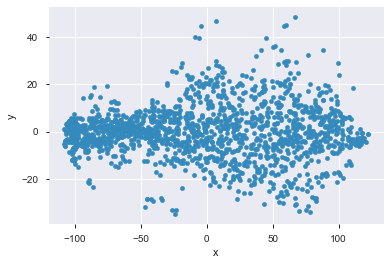

In [192]:
#Data reduction features look like this 
pd.DataFrame(result, columns=['x','y']).plot(kind='scatter', x='x', y='y')

In [181]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

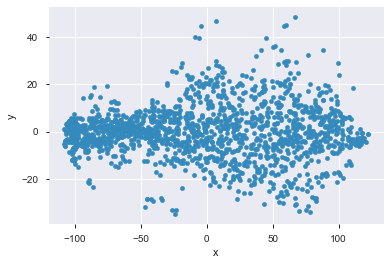

In [211]:
#Try Tiago's way

pd.DataFrame(result, columns=['x','y']).plot(kind='scatter', x='x', y='y')

## Dimensionality Reduction:
### t-Distributed Stochastic Neighbor Embedding (or in short t-SNE)

In [194]:
#Method 2
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1620 samples in 0.014s...
[t-SNE] Computed neighbors for 1620 samples in 0.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1620
[t-SNE] Computed conditional probabilities for sample 1620 / 1620
[t-SNE] Mean sigma: 8.721429
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.837818
[t-SNE] KL divergence after 300 iterations: 0.864244
t-SNE done! Time elapsed: 10.948623895645142 seconds


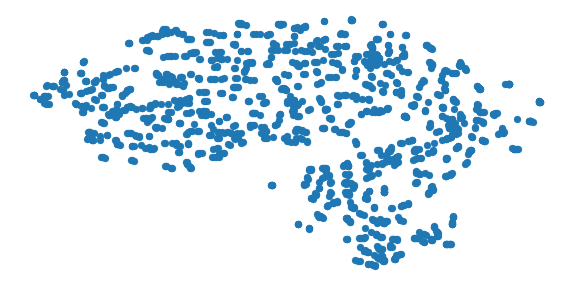

In [196]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality Reduction:
### UMAP

In [16]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

In [17]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(result)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP done! Time elapsed: 26.418642044067383 seconds


## Clustering:
### K-Means
We will propose five clusters to organize the features. Given the label names, we suspect that the themes suggest grouping in the areas of "economics", "political", "civic engagement", "business", and "legal issues". We will input our standardized variables (X_std) to run through the models.

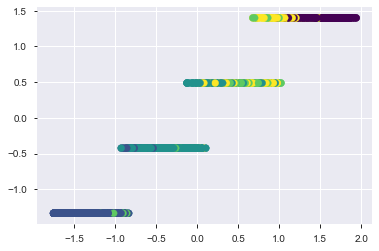

In [201]:
k_means = KMeans(n_clusters=5, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution. 1,620 values
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred,cmap='viridis')
plt.show()

In [206]:
#Best way to visualize clusters based on each y-prediction
import hvplot.pandas

df_for_plotting = pd.DataFrame(result, columns=['x','y'])
df_for_plotting['pf_rol_civil']  = human_df['pf_rol_criminal']
df_for_plotting['y_pred'] = y_pred
df_for_plotting.hvplot(kind='scatter', x='x', y='y', by='y_pred')

:NdOverlay   [y_pred]
   :Scatter   [x]   (y)

In [169]:
X_std[:,0].shape

(1620,)

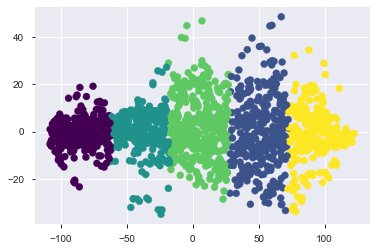

In [199]:
k_means = KMeans(n_clusters=5, random_state=123)
k_means.fit(result)
y_pred = k_means.predict(result)

# Plot the solution. 1,620 values
plt.scatter(result[:,0], result[:,1], c=y_pred,cmap='viridis') #color paremeter
plt.show()

## Clustering:
### MiniBatch

The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
66.2 ms ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


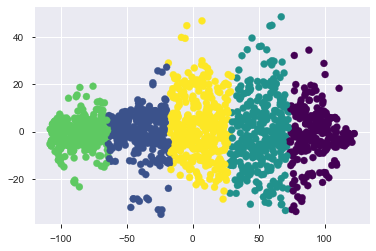

In [200]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=5, random_state=123)
%timeit mini_batch_k_means.fit(result)
y_pred_mini = mini_batch_k_means.predict(result)

# Plot the solution.
plt.scatter(result[:,0], result[:,1], c=y_pred_mini,cmap='viridis')
plt.show()

## Clustering:
### Hierarchical Clustering

In [18]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(result)

In [22]:
print (clusters)

[0 1 1 ... 2 2 0]


In [23]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [215]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [24]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [26]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(clusters, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 1.0
The silhoutte score of the GMM solution: 0.04421791612947629


In [37]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(result)
print(metrics.silhouette_score(result, labels, metric='euclidean'))

0.5485978867611092


## Summary: 
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data. 

~Regarding dimensionalty reduction: PCA is an easy to use and useful dimensionality reduction algorithm which preserves the dissimilarities in the data. PCA better represents the dissimilarities in the data.  However, PCA is relatively weak in retaining the local similarities in the low-dimensional representation. In contrast to PCA dimension reduction, where we used t-SNE, we see better represents the local similarities across our human freedom inices. Our data set includes less than 10,000 observations, so t-SNE is appropriate in this case. Finally, our UMAP dimension reduction model took 16 seconds longer to run than the t-SNE dimension reduction model.

~Regarding clustering: the number of observations is low: below 100,000 rows. So our computational time is quick. Both the K-means and mini-batch clusters displayed similar results: 5 very distinct clusters that were adjacent to each other along the In the K-means: We may assume all clusters have similar variance. So we measure the silhouette score to .548. Our three-cluster solution produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters. However, our Gaussian Mixture Model Cluster shows an Adjusted Rand Index of the GMM solution: 1.0. It is perfect.